In [36]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

# Determine Thresholds based on train set data

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_27604\2710161381.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


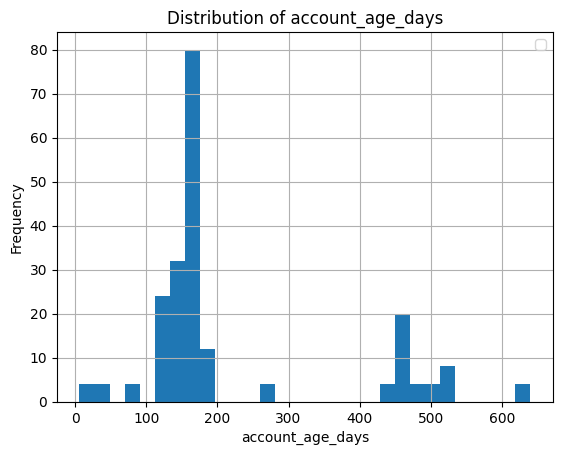

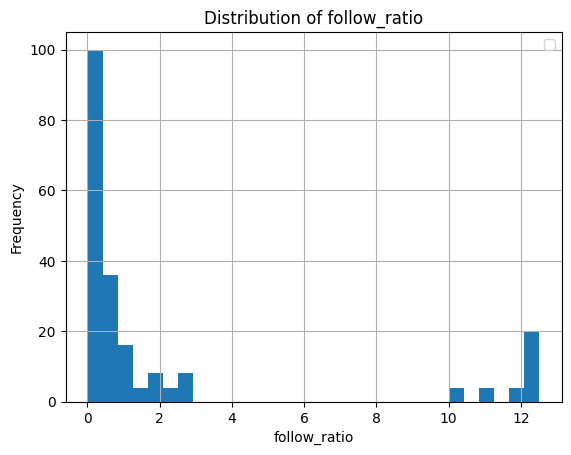

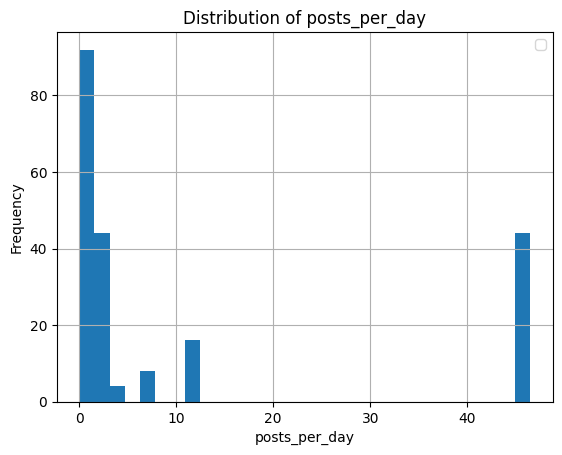

In [44]:
df = pd.read_json('./../bot_results_train.jsonl', lines=True)

# Plot histograms with threshold lines
for col in [('account_age_days'), ('follow_ratio'), ('posts_per_day')]:
    plt.figure()
    df[col].dropna().hist(bins=30)
    # plt.axvline(thr, linestyle='--', label=f'Threshold: {thr:.2f}')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()


In [45]:
df.head()

,is_bot,account_age_days,follow_ratio,posts_per_day,followers,follows,url
0,True,167,0.130435,46.488095,91,12,https://bsky.app/profile/did:plc:x7zxmjbmttzq6...
1,False,157,0.026096,2.721519,2988,78,https://bsky.app/profile/did:plc:jjxjwrox32mxo...
2,True,167,0.130435,46.488095,91,12,https://bsky.app/profile/did:plc:x7zxmjbmttzq6...
3,False,450,12.500000,0.077605,31,400,https://bsky.app/profile/did:plc:utytkrjsz6ulb...
4,False,640,0.223938,0.659906,258,58,https://bsky.app/profile/did:plc:q2etukujnutpb...


4


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_27604\300526203.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


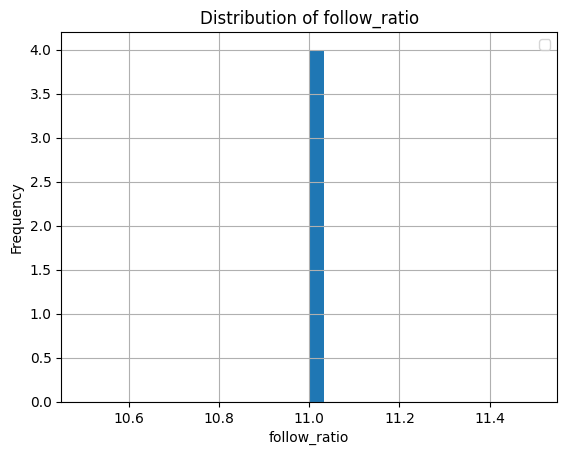

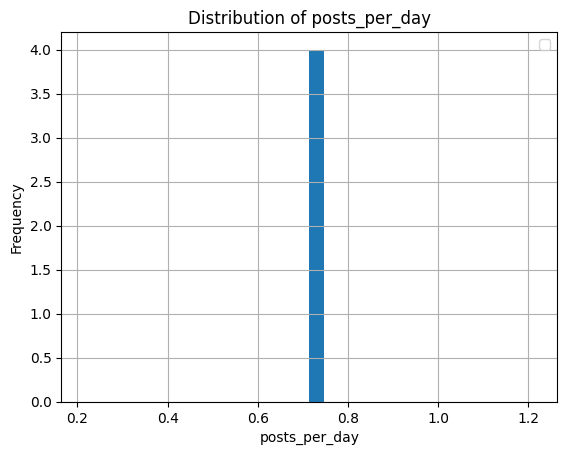

In [46]:
young_accounts = df[df['account_age_days'] < 30]
print(len(young_accounts))

# Plot followers and follows
for col in [('follow_ratio'), ('posts_per_day')]:
    plt.figure()
    young_accounts[col].dropna().hist(bins=30)
    # plt.axvline(thr, linestyle='--', label=f'Threshold: {thr:.2f}')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

### Accuracy, Precision, Recall and F1 metrics for test set (bot)

In [47]:
df = pd.read_json('./../bot_results_test.jsonl', lines=True)
df.rename(columns={"url": "URL"}, inplace=True)

In [48]:
ground_truth = pd.read_csv("./../test-data/labels-cleaned-test.csv")
merged = df.merge(
    ground_truth,
    on="URL", 
    how="inner",
)
print(len(merged))

30


In [49]:
merged.head()

,is_bot,account_age_days,follow_ratio,posts_per_day,followers,follows,URL,Labels
0,True,167,0.130435,46.517857,91,12,https://bsky.app/profile/did:plc:x7zxmjbmttzq6...,"['Safe Link Giveaway', 'Likely Bot Giveaway']"
1,False,191,0.915152,5.286458,164,151,https://bsky.app/profile/did:plc:pyu5cb7ljek4t...,['Likely Human Giveaway']
2,True,167,0.130435,46.517857,91,12,https://bsky.app/profile/did:plc:x7zxmjbmttzq6...,"['Safe Link Giveaway', 'Likely Bot Giveaway']"
3,True,672,0.231739,27.524517,5078,1177,https://bsky.app/profile/did:plc:lyyy57vno2vcs...,"['Safe Link Giveaway', 'Likely Human Giveaway']"
4,True,167,0.130435,46.517857,91,12,https://bsky.app/profile/did:plc:x7zxmjbmttzq6...,"['Safe Link Giveaway', 'Likely Bot Giveaway']"


In [50]:
merged['bot_giveaway'] = merged['Labels'].apply(lambda labs: "Likely Bot Giveaway" in labs)

In [56]:
y_true = merged['bot_giveaway']
y_pred = merged['is_bot']

# Label for humans (false) is positive
tp_mask = (~y_true) & (~y_pred)
tn_mask = (y_true) & (y_pred)
fp_mask = (~y_true) & (y_pred)
fn_mask = (y_true) & (~y_pred)

true_positives = tp_mask.sum()
true_negatives = tn_mask.sum()
false_positives = fp_mask.sum()
false_negatives = fn_mask.sum()

print(f"True positives: {true_positives}")
print(f"True negatives: {true_negatives}")
print(f"False positives: {false_positives}")
print(f"False negatives: {false_negatives}")

precision = precision_score(y_true, y_pred, pos_label=False)
recall    = recall_score(y_true, y_pred, pos_label=False)
f1        = f1_score(y_true, y_pred, pos_label=False)

print(f"Precision: {precision:.3f}")
print(f"Recall:    {recall:.3f}")
print(f"F1 score:  {f1:.3f}")

True positives: 13
True negatives: 9
False positives: 5
False negatives: 3
Precision: 0.812
Recall:    0.722
F1 score:  0.765


In [40]:
y_true.sum()

23

In [41]:
y_pred.sum()

11

### Accuracy, Precision, Recall and F1 metrics for safe link

In [68]:
df = pd.read_json('./../labels_test.jsonl', lines=True)

In [69]:
df.columns = ['predicted', 'ground_truth']
df.head()

,predicted,ground_truth
0,"[Safe Link Giveaway, Likely Bot Giveaway]","[Safe Link Giveaway, Likely Bot Giveaway]"
1,[Likely Human Giveaway],[Likely Human Giveaway]
2,"[Safe Link Giveaway, Likely Bot Giveaway]","[Safe Link Giveaway, Likely Bot Giveaway]"
3,"[Safe Link Giveaway, Likely Bot Giveaway]","[Safe Link Giveaway, Likely Human Giveaway]"
4,"[Safe Link Giveaway, Likely Bot Giveaway]","[Safe Link Giveaway, Likely Bot Giveaway]"


In [70]:
gt = df['ground_truth'].apply(lambda labels: 'Safe Link Giveaway' in labels)
pred = df['predicted'].apply(lambda labels: 'Safe Link Giveaway' in labels)

# Confusion counts
true_positives = ((gt) & (pred)).sum()
true_negatives = ((~gt) & (~pred)).sum()
false_positives = ((~gt) & (pred)).sum()
false_negatives = ((gt) & (~pred)).sum()

In [71]:
print(f"True positives: {true_positives}")
print(f"True negatives: {true_negatives}")
print(f"False positives: {false_positives}")
print(f"False negatives: {false_negatives}")

accuracy = (true_positives + true_negatives) / (true_positives + true_negatives + false_positives + false_negatives)
precision = precision_score(y_true, y_pred, pos_label=False)
recall    = recall_score(y_true, y_pred, pos_label=False)
f1        = f1_score(y_true, y_pred, pos_label=False)

print(f"Accuracy:  {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall:    {recall:.3f}")
print(f"F1 score:  {f1:.3f}")

True positives: 21
True negatives: 58
False positives: 1
False negatives: 0
Accuracy:  0.988
Precision: 0.812
Recall:    0.722
F1 score:  0.765


### Time measurements

In [72]:
time_df = pd.read_json('./../time_measurement.jsonl', lines=True)

In [73]:
summary = time_df.describe(percentiles=[.5, .9, .95, .99])
print(summary)

               0
count  80.000000
mean    0.227631
std     0.109997
min     0.139489
50%     0.146896
90%     0.394886
95%     0.399655
99%     0.404857
max     0.411522


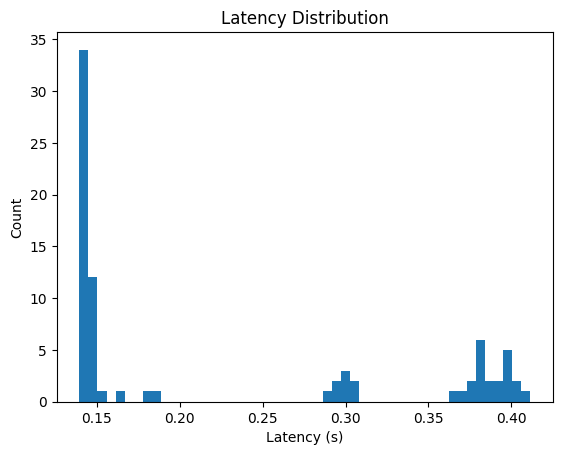

In [102]:
plt.hist(time_df, bins=50)
plt.xlabel('Latency (s)')
plt.ylabel('Count')
plt.title('Latency Distribution')
plt.show()

### Memory measurements

In [81]:
memory_df = pd.read_json('./../memory_measurement.jsonl', lines=True)
memory_df.columns = ["current", "peak"]
memory_df_kib = memory_df[['current', 'peak']] / 1024
summary = memory_df_kib.describe(percentiles=[.5, .9, .95, .99])
print(summary)

         current        peak
count  80.000000   80.000000
mean   16.973682   87.540417
std     7.391445   13.829385
min    10.790039   74.531250
50%    12.406738   90.812988
90%    26.661133  105.693848
95%    30.092725  109.321484
99%    35.676621  123.964727
max    43.365234  142.733398


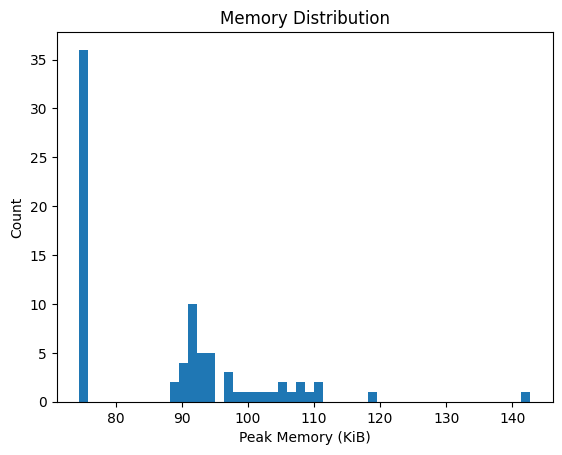

In [85]:
plt.hist(memory_df_kib["peak"], bins=50)
plt.xlabel('Peak Memory (KiB)')
plt.ylabel('Count')
plt.title('Memory Distribution')
plt.show()

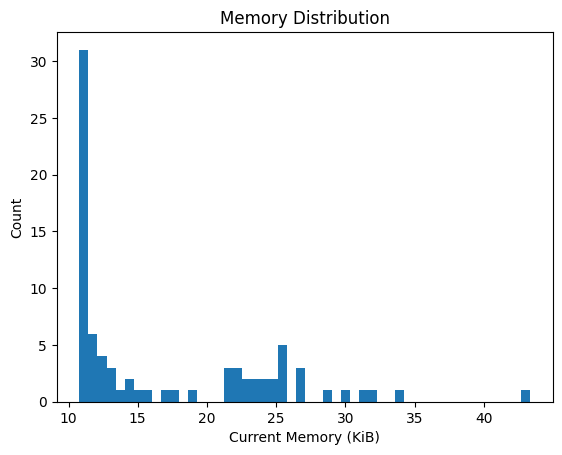

In [86]:
plt.hist(memory_df_kib["current"], bins=50)
plt.xlabel('Current Memory (KiB)')
plt.ylabel('Count')
plt.title('Memory Distribution')
plt.show()

### Network measurements

In [97]:
network_df = pd.read_json('./../network_measurement.jsonl', lines=True)
network_df.columns = ["sent", "recv"]
network_df_kib = network_df[["sent", "recv"]] / 1024
network_df_kib["total"] = network_df_kib["sent"] + network_df_kib["recv"]

summary = network_df_kib.describe(percentiles=[.5, .9, .95, .99])
summary = summary.round(2)
print(summary)

        sent   recv   total
count  80.00  80.00   80.00
mean   34.97  22.00   56.97
std    16.78  12.74   24.17
min    13.90   3.27   17.18
50%    25.54  21.15   55.07
90%    59.72  39.19   91.01
95%    64.10  45.85  102.95
99%    68.99  50.27  111.05
max    70.37  50.39  115.26


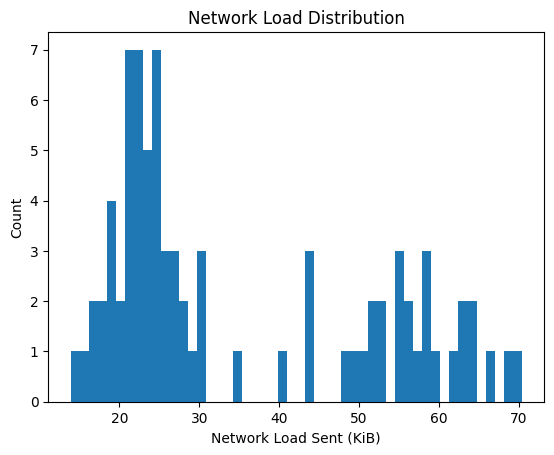

In [98]:
plt.hist(network_df_kib["sent"], bins=50)
plt.xlabel('Network Load Sent (KiB)')
plt.ylabel('Count')
plt.title('Network Load Distribution')
plt.show()

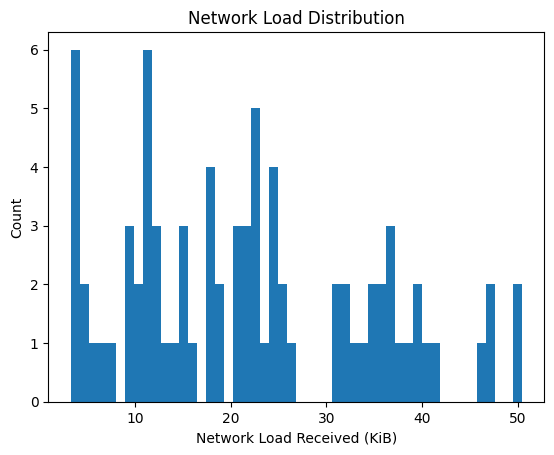

In [99]:
plt.hist(network_df_kib["recv"], bins=50)
plt.xlabel('Network Load Received (KiB)')
plt.ylabel('Count')
plt.title('Network Load Distribution')
plt.show()

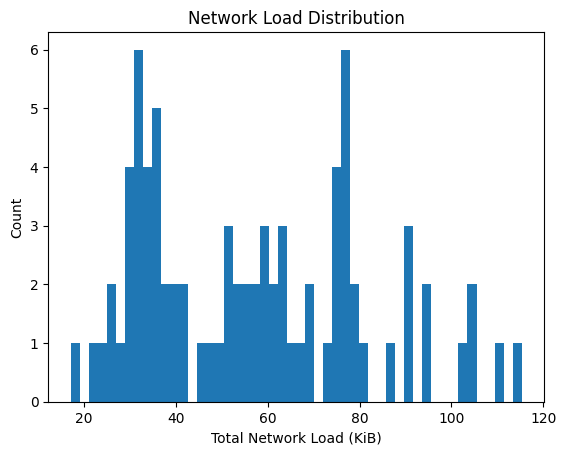

In [101]:
plt.hist(network_df_kib["total"], bins=50)
plt.xlabel('Total Network Load (KiB)')
plt.ylabel('Count')
plt.title('Network Load Distribution')
plt.show()